#### Group Number : 211
#### Group Members :
                     Akash Dixit  (2020SC04887)
                     Rashmi Singh (2020SC04929)
                     Parul Jain   (2020SC04573)
#### Assignment Dataset : iris Data

# Data preprocessing
# importing the Libraries

In [1]:
import math
from pprint import pprint
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import operator
import warnings
warnings.filterwarnings('ignore')

# 1. Load the dataset and describe it.

In [2]:
file_columns = ['sepal_len','sepal_width','petal_len','petal_width','class']
data = pd.read_csv('iris.csv',header=None, names=file_columns)
data.head()

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Shuffle the data
To prevent bias in learning, we shuffle the data before dividing it into trainning and testing set.

In [3]:
data = data.sample(frac=1).reset_index(drop=True)
data['seq'] = data.index
data.head()

,sepal_len,sepal_width,petal_len,petal_width,class,seq
0,6.3,2.3,4.4,1.3,Iris-versicolor,0
1,5.0,3.0,1.6,0.2,Iris-setosa,1
2,5.4,3.7,1.5,0.2,Iris-setosa,2
3,5.0,3.5,1.6,0.6,Iris-setosa,3
4,5.7,2.8,4.1,1.3,Iris-versicolor,4


# 2. Split the data as per 80:20 ratios of training and test set.

In [4]:
#randomize the indices
indices = np.random.permutation(data.shape[0])
div = int(0.80 * len(indices))
train_id, test_id = indices[:div], indices[div:]

#dividing the dataset using randomized indices
train_set, test_set = data.loc[train_id,:], data.loc[test_id,:]
print("Train Set:\n", train_set, "\n\nTest Set:\n", test_set)

mean_train_set = train_set.mean()
mean_test_set = test_set.mean()
std_train_set = train_set.std()
std_test_set = test_set.std()

Train Set:
      sepal_len  sepal_width  petal_len  petal_width            class  seq
0          6.3          2.3        4.4          1.3  Iris-versicolor    0
130        6.1          2.6        5.6          1.4   Iris-virginica  130
94         5.6          2.9        3.6          1.3  Iris-versicolor   94
124        5.1          3.5        1.4          0.2      Iris-setosa  124
144        4.8          3.0        1.4          0.1      Iris-setosa  144
..         ...          ...        ...          ...              ...  ...
17         4.9          2.4        3.3          1.0  Iris-versicolor   17
99         5.7          2.6        3.5          1.0  Iris-versicolor   99
9          7.6          3.0        6.6          2.1   Iris-virginica    9
54         7.2          3.6        6.1          2.5   Iris-virginica   54
24         6.4          2.8        5.6          2.2   Iris-virginica   24

[120 rows x 6 columns] 

Test Set:
      sepal_len  sepal_width  petal_len  petal_width            

# 3. Normalize the dataset. Visualize the dataset before and after normalization.

## Some General Visualization

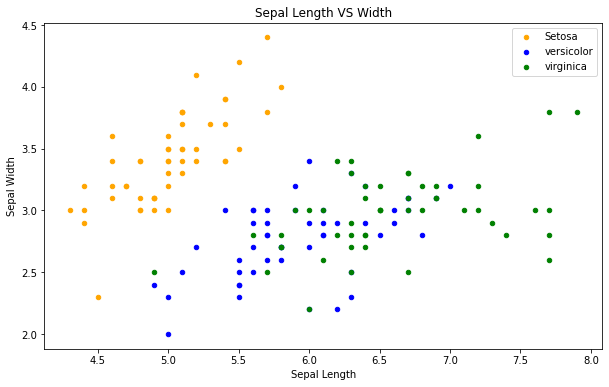

In [5]:
fig = data[data['class']=='Iris-setosa'].plot(kind='scatter',x='sepal_len',y='sepal_width',color='orange', label='Setosa')
data[data['class']=='Iris-versicolor'].plot(kind='scatter',x='sepal_len',y='sepal_width',color='blue', label='versicolor',ax=fig)
data[data['class']=='Iris-virginica'].plot(kind='scatter',x='sepal_len',y='sepal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

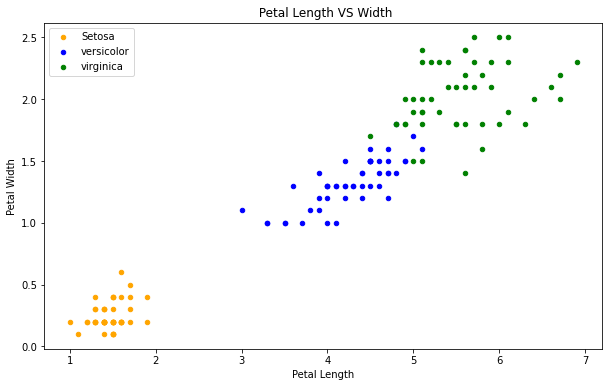

In [6]:
fig = data[data['class']=='Iris-setosa'].plot.scatter(x='petal_len',y='petal_width',color='orange', label='Setosa')
data[data['class']=='Iris-versicolor'].plot.scatter(x='petal_len',y='petal_width',color='blue', label='versicolor',ax=fig)
data[data['class']=='Iris-virginica'].plot.scatter(x='petal_len',y='petal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

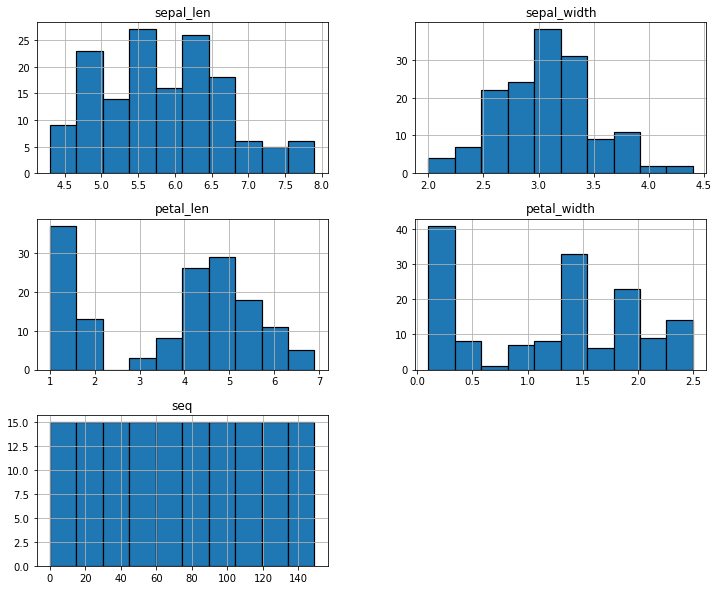

In [7]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

<AxesSubplot:xlabel='class', ylabel='sepal_width'>

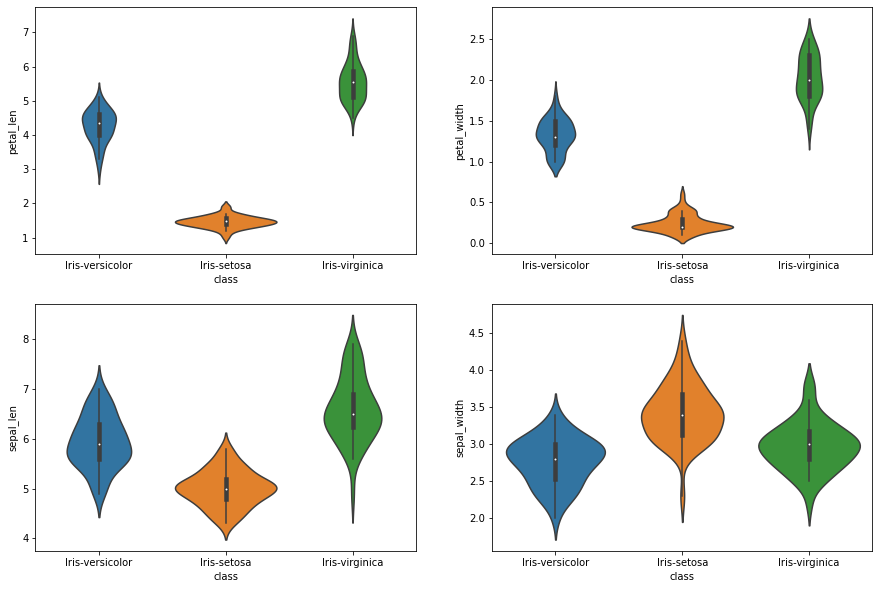

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='class',y='petal_len',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='class',y='petal_width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='class',y='sepal_len',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='class',y='sepal_width',data=data)

## Data Visulization before Normalization

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

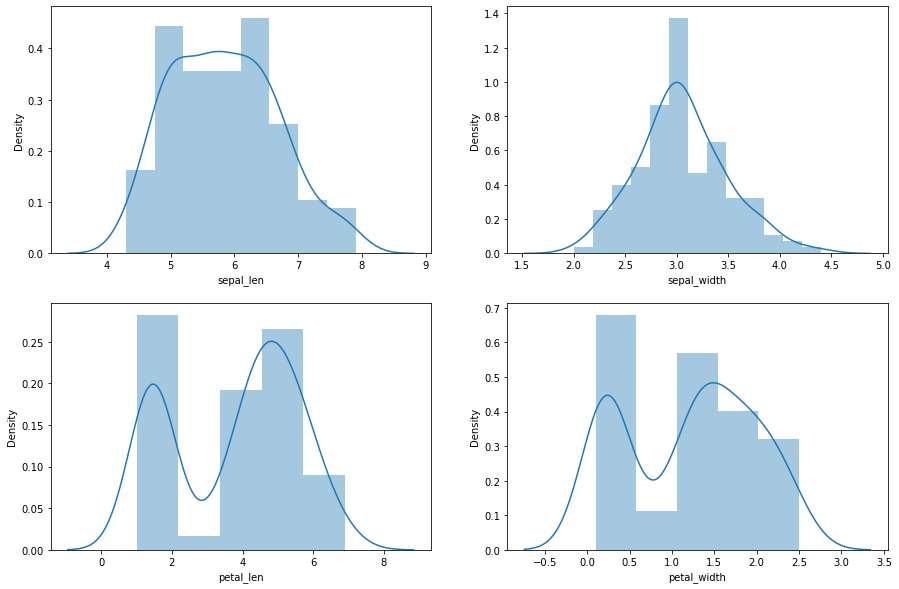

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(data['sepal_len'])
plt.subplot(2,2,2)
sns.distplot(data['sepal_width'])
plt.subplot(2,2,3)
sns.distplot(data['petal_len'])
plt.subplot(2,2,4)
sns.distplot(data['petal_width'])

# Applying Normalization

In [10]:
x_data = data[['sepal_len','sepal_width','petal_len','petal_width']]

In [11]:
scaler = MinMaxScaler()
scaler.fit(x_data)
x_new_Data = scaler.transform(x_data)
x_new_Data

array([[0.55555556, 0.125     , 0.57627119, 0.5       ],
       [0.19444444, 0.41666667, 0.10169492, 0.04166667],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.19444444, 0.625     , 0.10169492, 0.20833333],
       [0.38888889, 0.33333333, 0.52542373, 0.5       ],
       [0.38888889, 0.75      , 0.11864407, 0.08333333],
       [0.94444444, 0.33333333, 0.96610169, 0.79166667],
       [0.5       , 0.41666667, 0.61016949, 0.54166667],
       [0.47222222, 0.08333333, 0.50847458, 0.375     ],
       [0.91666667, 0.41666667, 0.94915254, 0.83333333],
       [0.66666667, 0.54166667, 0.79661017, 1.        ],
       [0.33333333, 0.16666667, 0.45762712, 0.375     ],
       [0.05555556, 0.125     , 0.05084746, 0.08333333],
       [0.55555556, 0.58333333, 0.77966102, 0.95833333],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.25      , 0.29166667, 0.49152542, 0.54166667],
       [0.36111111, 0.41666667, 0.59322034, 0.58333333],
       [0.16666667, 0.16666667,

In [12]:
normalize_data = pd.DataFrame(x_new_Data, columns = ['sepal_len','sepal_width','petal_len','petal_width'])
normalize_data

,sepal_len,sepal_width,petal_len,petal_width
0,0.555556,0.125000,0.576271,0.500000
1,0.194444,0.416667,0.101695,0.041667
2,0.305556,0.708333,0.084746,0.041667
3,0.194444,0.625000,0.101695,0.208333
4,0.388889,0.333333,0.525424,0.500000
...,...,...,...,...
145,0.333333,0.625000,0.050847,0.041667
146,0.388889,1.000000,0.084746,0.125000
147,0.444444,0.500000,0.644068,0.708333
148,0.416667,0.333333,0.694915,0.958333


## Visual After Noramlization

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

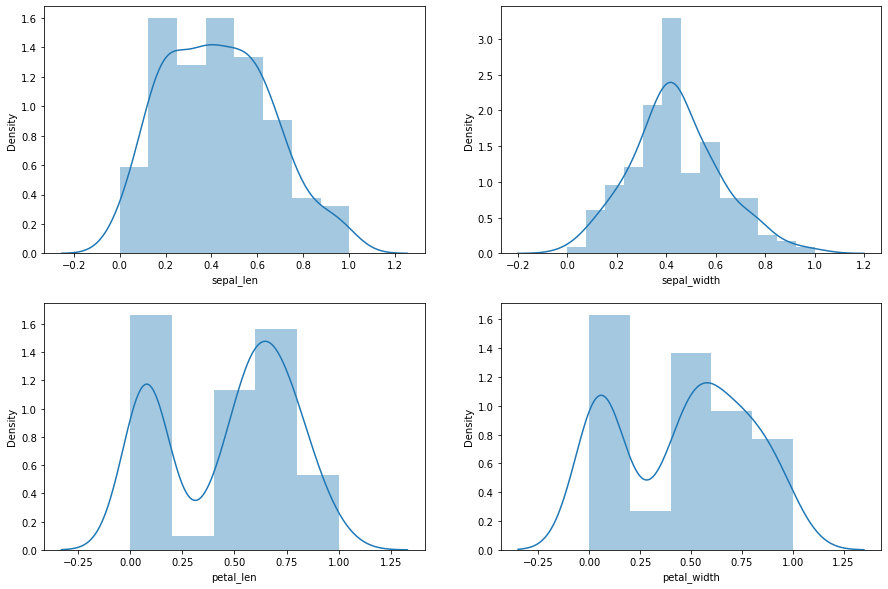

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(normalize_data['sepal_len'])
plt.subplot(2,2,2)
sns.distplot(normalize_data['sepal_width'])
plt.subplot(2,2,3)
sns.distplot(normalize_data['petal_len'])
plt.subplot(2,2,4)
sns.distplot(normalize_data['petal_width'])

## 4. Calculate Similarity based on distance function of your choice

In [14]:
data = data.sample(frac=1).reset_index(drop=True)
data['seq'] = data.index
data.head()

,sepal_len,sepal_width,petal_len,petal_width,class,seq
0,5.9,3.0,4.2,1.5,Iris-versicolor,0
1,5.0,3.5,1.6,0.6,Iris-setosa,1
2,5.0,3.0,1.6,0.2,Iris-setosa,2
3,5.5,2.5,4.0,1.3,Iris-versicolor,3
4,6.7,3.3,5.7,2.5,Iris-virginica,4


In [15]:
dev_size = int(data.shape[0]*0.80)
test_size = int(data.shape[0]*0.20)

dev = data[:dev_size]

test = data[test_size:]

### The steps involved in kNN are

- Calculate k nearest neighbors for every test data point using a distance metric
- Elect the most dominant class among the nearest neighbors
- In order to determine the best hyperparameters i.e. distance metric and k value, we need to first measure their performance on the development dataset. This gives us insight about which hyperparameter fit this dataset well

- K values
- We experiment with the following values of k - [1,3,5,7]

Distance metrics
For this dataset, we have used the following distance metrics

1. Euclidian distance

In [16]:
def get_euclidean(row1, row2):
    return math.sqrt(sum([(x1-x2)**2 for x1,x2 in zip(row1,row2)]))

In [17]:
def get_cosine_sim(row1, row2):
    return math.acos(
        sum([x1*x2 for x1,x2 in zip(row1,row2)])/(sum([i**2 for i in row1]) * sum([i**2 for i in row2]))
    )

 Normalized Euclidean distance

In [18]:
ndev = pd.DataFrame(columns=['sepal_len', 'sepal_width','petal_len','petal_width', 'class', 'seq'])

ndev['class'] = dev['class'].copy()
ndev['seq'] = dev['seq'].copy()

ndev['sepal_len'] = dev['sepal_len'].apply(
    lambda x: (x-dev['sepal_len'].min())/(dev['sepal_len'].max()-dev['sepal_len'].min()))

ndev['sepal_width'] = dev['sepal_width'].apply(
    lambda x: (x-dev['sepal_width'].min())/(dev['sepal_width'].max()-dev['sepal_width'].min()))

ndev['petal_len'] = dev['petal_len'].apply(
    lambda x: (x-dev['petal_len'].min())/(dev['petal_len'].max()-dev['petal_len'].min()))

ndev['petal_width'] = dev['petal_width'].apply(
    lambda x: (x-dev['petal_width'].min())/(dev['petal_width'].max()-dev['petal_width'].min())) 

## Calculate Distances
Distance between every point in the dataset and every other point is calculated by using the Euclidean, Cosine similariy, and Normalized Euclidean.

In [19]:
dev2 = dev.values
ndev2 = ndev.values
eud = []
cosine_sim = []
neud = []
l = len(dev2)
for i in range(l):
    eu_distance = []
    cos_sim = []
    neu_distance = []
    for j in range(l):
        if(i!=j):
            index = dev2[j][5]
            nindex = ndev2[j][5]
            ed = get_euclidean(dev2[i][:-2], dev2[j][:-2])
            cs = get_cosine_sim(dev2[i][:-2], dev2[j][:-2])
            neu = get_euclidean(ndev2[i][:-2], ndev2[j][:-2])
            
            eu_distance.append((ed, index))
            cos_sim.append((cs, index))
            neu_distance.append((neu, nindex))
            
    eu_distance.sort(key= lambda x: x[0])
    cos_sim.sort(key= lambda x: x[0])
    neu_distance.sort(key= lambda x: x[0])
    
    eu_distance = [i[1] for i in eu_distance]
    cos_sim = [i[1] for i in cos_sim]
    neu_distance = [i[1] for i in neu_distance]
    
    eud.append(eu_distance)
    cosine_sim.append(cos_sim)
    neud.append(neu_distance)
    

dev['euclidean'] = eud
dev['cosine_sim'] = cosine_sim
dev['n_euclidean'] = neud

# 5. Define a function to return k- nearest neighbors

k closest neighbors are selected for every point in the test set.

In [20]:
def get_nearest(row, distance_measure,k):
    return row[distance_measure][:k]

In [21]:
def get_dominant_class(df, neighbors):
    classes = df[df['seq'].isin(neighbors)]['class']
    return classes.value_counts().index[0]

In [22]:
k = 1
hyper_params = []
acc = {1: {}, 3:{}, 5:{}, 7:{}}

while k <= 7:
    dev['eud_{}'.format(k)] = dev.apply(lambda x: get_nearest(x, 'euclidean',k), axis=1)
    dev['cosim_{}'.format(k)] = dev.apply(lambda x: get_nearest(x, 'cosine_sim',k), axis=1)
    dev['neud_{}'.format(k)] = dev.apply(lambda x: get_nearest(x, 'n_euclidean',k), axis=1)
    
    dev['eud_{}_class'.format(k)] = dev['eud_{}'.format(k)].apply(lambda row: get_dominant_class(dev, row))
    dev['cosim_{}_class'.format(k)] = dev['cosim_{}'.format(k)].apply(lambda row: get_dominant_class(dev, row))
    dev['neud_{}_class'.format(k)] = dev['neud_{}'.format(k)].apply(lambda row: get_dominant_class(dev, row))
    
    hyper_params.append('eud_{}_class'.format(k))
    hyper_params.append('cosim_{}_class'.format(k))
    hyper_params.append('neud_{}_class'.format(k))
    
    acc[k]['eud'] = dev[dev['class']==dev['eud_{}_class'.format(k)]].shape[0]/dev.shape[0]
    acc[k]['cosine'] = dev[dev['class']==dev['cosim_{}_class'.format(k)]].shape[0]/dev.shape[0]
    acc[k]['neud'] = dev[dev['class']==dev['neud_{}_class'.format(k)]].shape[0]/dev.shape[0]
    
    k+=2

### Observe various hyper parameters

In [23]:
cols = ['class'] + hyper_params
dev[cols].head()

,class,eud_1_class,cosim_1_class,neud_1_class,eud_3_class,cosim_3_class,neud_3_class,eud_5_class,cosim_5_class,neud_5_class,eud_7_class,cosim_7_class,neud_7_class
0,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor
1,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
3,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor
4,Iris-virginica,Iris-virginica,Iris-setosa,Iris-virginica,Iris-virginica,Iris-setosa,Iris-virginica,Iris-virginica,Iris-setosa,Iris-virginica,Iris-virginica,Iris-setosa,Iris-virginica


In [24]:
pprint(acc)

{1: {'cosine': 0.30833333333333335,
     'eud': 0.9583333333333334,
     'neud': 0.9583333333333334},
 3: {'cosine': 0.30833333333333335,
     'eud': 0.9666666666666667,
     'neud': 0.9583333333333334},
 5: {'cosine': 0.30833333333333335,
     'eud': 0.9583333333333334,
     'neud': 0.9583333333333334},
 7: {'cosine': 0.30833333333333335,
     'eud': 0.9666666666666667,
     'neud': 0.9583333333333334}}


# Comparing accuracies at various values of K

At this stage, we have successfully used kNN on the test set to tune our hyperparameters - k and distance metrics. The graph below shows the performance of each combination of k and distance metrics

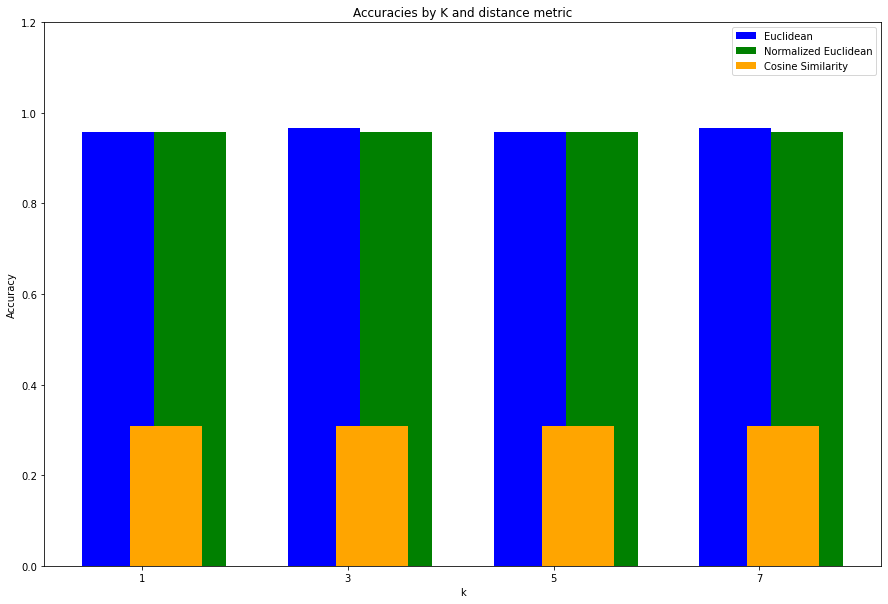

In [25]:
labels = [1,3,5,7]
eud_acc = [acc[i]['eud'] for i in list(acc)]
cos_acc = [acc[i]['cosine'] for i in list(acc)]
neud_acc = [acc[i]['neud'] for i in list(acc)]

width = 0.35
x = np.arange(len(labels)) 

fig, ax = plt.subplots(figsize=(15,10))
eu_bar = ax.bar(x - width/3, eud_acc, width, label='Euclidean', color='blue')
neu_bar = ax.bar(x + width*2/3, neud_acc, width, label='Normalized Euclidean', color='green')
cosine_bar = ax.bar(x + width/3, cos_acc, width, label='Cosine Similarity', color='orange')

ax.set_ylabel('Accuracy')
ax.set_ylim(0,1.2)
ax.set_title('Accuracies by K and distance metric')
ax.set_xlabel("k")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')
plt.show()

## Determine optimal hyper-parameters

As it can be noticed from the above chart, cosine similarity is **not** a good distance measure for this dataset regardless of the number of neighbors. **Euclidean** and **Normalized Euclidean** distance performed better on this dataset for `k = [3,5]`. so we pick 3 and ***Euclidean distance*** as best Hyper-parameters for this dataset.

# Predict class of test data

Here we use the optimal hyper-parameters we obtained from the above steps to predict the test data using the following steps

## a. Calculate Euclidean distance
Calculate euclidean distance between every point in the test dataset with every point in the test set and pick 3 nearest neighbors

In [26]:
test['seq'] = test.index
test2 = test.values
test_eud = []
l = len(test)
for i in range(l):
    test_eu_distance = []
    for j in range(len(dev)):
        index = dev2[j][5]
        ed = get_euclidean(test2[i][:-2], dev2[j][:-2])
        test_eu_distance.append((ed, index))
        
    test_eu_distance.sort(key= lambda x: x[0])
    test_eu_distance = [i[1] for i in test_eu_distance]
    test_eud.append(test_eu_distance)
    
test['euclidean'] = test_eud

## b. Pick Nearest Neighbors

Since we obtained 3 as optimal value for the hyperparameter `k`, we find **3** nearest neighbors between every point in the test set and every point in the dev set using ***Euclidean Distance***

In [27]:
test['eu'] = test.apply(lambda x: get_nearest(x, 'euclidean',3), axis=1)
test[file_columns+['eu']].head()

,sepal_len,sepal_width,petal_len,petal_width,class,eu
30,7.1,3.0,5.9,2.1,Iris-virginica,"[30, 11, 55]"
31,5.7,3.0,4.2,1.2,Iris-versicolor,"[31, 19, 82]"
32,4.7,3.2,1.6,0.2,Iris-setosa,"[32, 114, 102]"
33,6.3,2.5,4.9,1.5,Iris-versicolor,"[33, 42, 62]"
34,6.2,3.4,5.4,2.3,Iris-virginica,"[34, 16, 86]"


## c. Classify the test set

Pick the most dominant class among ***3*** nearest neighbors

In [28]:
test['eu_class'] = test['eu'].apply(lambda row: get_dominant_class(dev, row))
test[file_columns+['eu_class']].head()

,sepal_len,sepal_width,petal_len,petal_width,class,eu_class
30,7.1,3.0,5.9,2.1,Iris-virginica,Iris-virginica
31,5.7,3.0,4.2,1.2,Iris-versicolor,Iris-versicolor
32,4.7,3.2,1.6,0.2,Iris-setosa,Iris-setosa
33,6.3,2.5,4.9,1.5,Iris-versicolor,Iris-virginica
34,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica


## d. Accuracy over test set
accuracy of the predicted class over the test dataset

In [29]:
test_acc = test[test['class']==test['eu_class']].shape[0]/test.shape[0]
print('Test Accuracy: {:2.4f}%'.format(test_acc*100))

Test Accuracy: 95.0000%


### 6. Test the KNN Algorithm on the test dataset
### 7. Compare your implementation with sklearn library. Also calculate the accuracy of both methods. Bring out your inference about both methods.
### 8. Repeat the procedure with different values of K and find the best value.
### 9. Perform hyper-parameter tuning using K-fold Cross Validation
### 10. Use the test set and the optimal hyper-parameters to compute the final accuracy.

In [33]:
array = data.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

seed = 7
scoring = 'accuracy'

In [34]:
#Applying K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, Y_train)
y_pred_knn = knn1.predict(X_validation)
#Calculating the accuracy
from sklearn import metrics
acc_knn = round(metrics.accuracy_score(Y_validation,y_pred_knn),3)
print("Accuray at K = 1: ", acc_knn)

Accuray at K = 1:  0.967


In [35]:
#Applying K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train, Y_train)
y_pred_knn = knn2.predict(X_validation)
#Calculating the accuracy
from sklearn import metrics
acc_knn = round(metrics.accuracy_score(Y_validation,y_pred_knn),3)
print("Accuray at K = 2: ", acc_knn)

Accuray at K = 2:  0.967


In [36]:
#Applying K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, Y_train)
y_pred_knn = knn3.predict(X_validation)
#Calculating the accuracy
from sklearn import metrics
acc_knn = round(metrics.accuracy_score(Y_validation,y_pred_knn),3)
print("Accuray at K = 3: ", acc_knn)

Accuray at K = 3:  0.967


In [37]:
#Applying K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(X_train, Y_train)
y_pred_knn = knn4.predict(X_validation)
#Calculating the accuracy
from sklearn import metrics
acc_knn = round(metrics.accuracy_score(Y_validation,y_pred_knn),3)
print("Accuray at K = 4: ", acc_knn)

Accuray at K = 4:  0.967


### As we can see accuracy of method 1 is 96.6% where as accuracy of KNN Model is 93.3%

In [38]:
#Finding the optimim value of k
k_range  = range(3,21)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred_knn = knn.predict(X_validation)
    acc_knn = round(metrics.accuracy_score(Y_validation,y_pred_knn),3)
    scores.append(acc_knn)

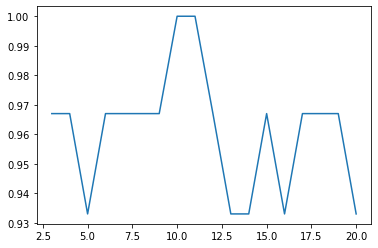

In [39]:
#plotting accuracy vs k-value plot
plt.plot(k_range,scores)

In [40]:
#Applying K Nearest Neighbor for k=13
from sklearn.neighbors import KNeighborsClassifier
knn13 = KNeighborsClassifier(n_neighbors=13)
knn13.fit(X_train, Y_train)
y_pred_knn = knn13.predict(X_validation)
#Calculating the accuracy
from sklearn import metrics
acc_knn = round(metrics.accuracy_score(Y_validation,y_pred_knn),3)
print('KNN Accuracy: '+ str(round(acc_knn,3)))

KNN Accuracy: 0.933


In [41]:
#Cross Validation
Y = data['class']
from sklearn.model_selection import cross_val_score
cvs_knn = cross_val_score(knn,X,Y,cv=13).mean()
print('Cross Val Score : '+ str(round(cvs_knn,3)))

Cross Val Score : 0.974


In [42]:
array = data.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

seed = 7
scoring = 'accuracy'

In [43]:
kfold = model_selection.KFold(n_splits=13)
cv_results = model_selection.cross_val_score(KNeighborsClassifier(), X_train, Y_train, cv=kfold, scoring=scoring)

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print("Test accuracy: ",accuracy_score(Y_validation, predictions))

Test accuracy:  0.9333333333333333


### So we can see after applying cross validation the Final accuracy of the model is 93%

## ------------------------XXXXXXXXXXXXX---------------End---------------xxxxxxxxx-----------------